In [1]:
#Importing the libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the data
filepath = "dataset/data.csv"
data = pd.read_csv(filepath, header = None)
data.columns = ['sepal_lenght','sepal_width','petal_length','petal_width','Category']
data.head()

,sepal_lenght,sepal_width,petal_length,petal_width,Category
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


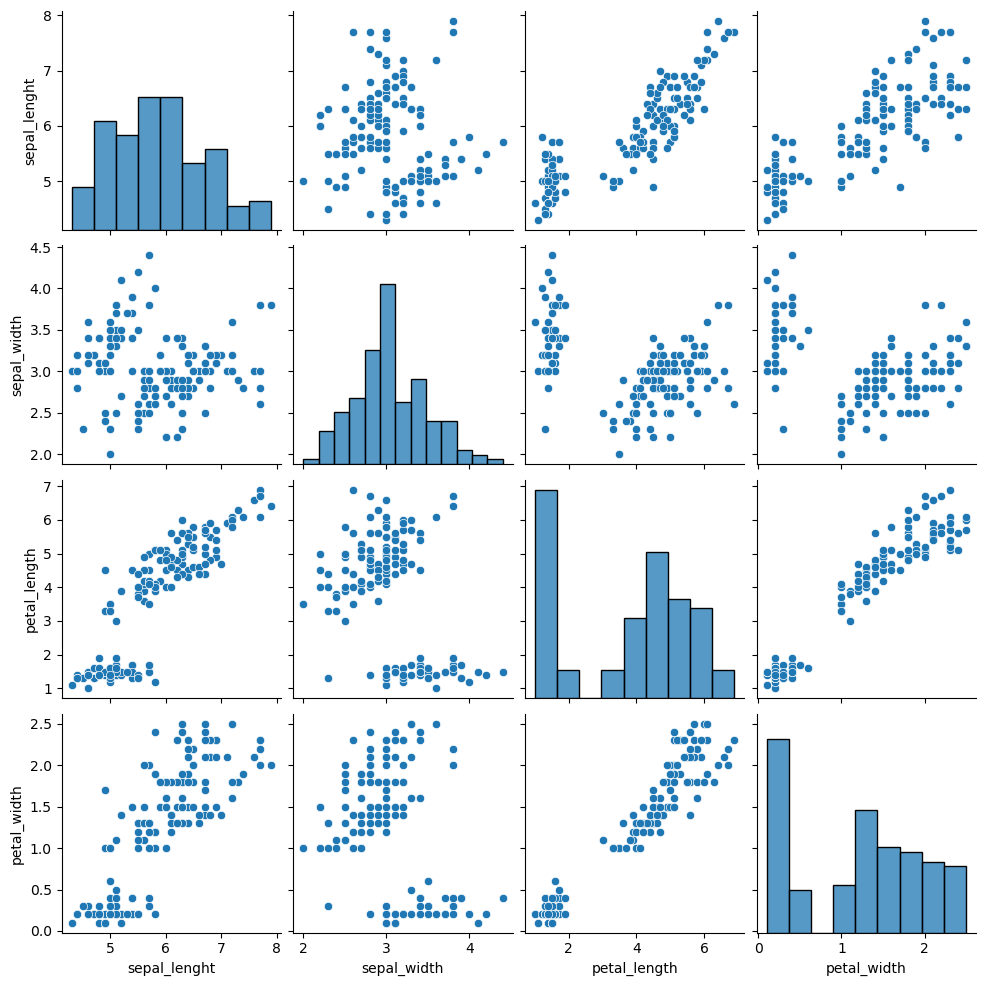

In [3]:
#Plotting the curves
sns.pairplot(data)

c:\Users\Tanis\anaconda3\envs\Neur_Net\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

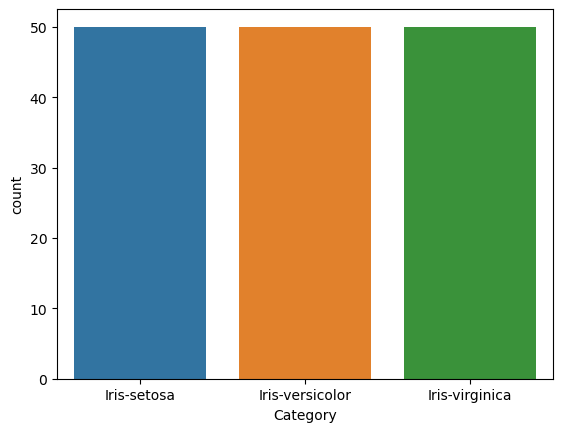

In [4]:
#Check Class Distribution
data.Category.value_counts()
sns.countplot('Category',data=data)

In [5]:
#Seperating IV and DV
X = data.iloc[:,:4]
y = data['Category']

In [6]:
#Splitting dataset in train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [7]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
#Applying K Nearest Neighbor
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
y_pred_knn = knn3.predict(X_test)

In [9]:
#Calculating the accuracy
from sklearn import metrics
acc_knn = round(metrics.accuracy_score(y_test,y_pred_knn),3)
print(acc_knn)

0.974


In [10]:
#Finding the optimim value of k
k_range  = range(3,21)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    acc_knn = round(metrics.accuracy_score(y_test,y_pred_knn),3)
    scores.append(acc_knn)

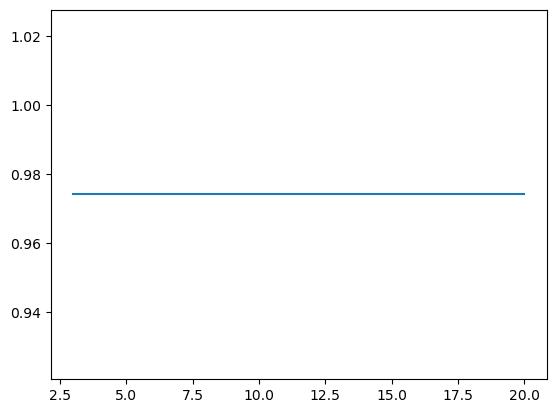

In [11]:
#plotting accuracy vs k-value plot
plt.plot(k_range,scores)

In [12]:
#Applying K Nearest Neighbor for k=6
from sklearn.neighbors import KNeighborsClassifier
knn6 = KNeighborsClassifier(n_neighbors=6)
knn6.fit(X_train, y_train)
y_pred_knn = knn6.predict(X_test)

In [13]:
#Calculating the accuracy
from sklearn import metrics
acc_knn = round(metrics.accuracy_score(y_test,y_pred_knn),3)
print('KNN Accuracy: '+ str(round(acc_knn,3)))

KNN Accuracy: 0.974


In [18]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Model_Decision_Tree = DecisionTreeClassifier()

Model_Decision_Tree.fit(X_train, y_train)

y_pred = Model_Decision_Tree.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.92      0.92      0.92        12

       accuracy                           0.95        38
      macro avg       0.94      0.94      0.94        38
   weighted avg       0.95      0.95      0.95        38

[[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]
accuracy is 0.9473684210526315
